# Deviation 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy for numerical operations

# Read the CSV file
data = pd.read_csv('P001_S001.csv')

# Extract relevant columns
time_values = data['Time'] / 60  # Convert to minutes
road_positions = data['Road Position (m)']
steering_positions = data['Steering Position']
speed_kph = data['Speed (kph)']

# Parameters for calculations
window_size = 25*300  # Window size for LPV calculation
upper_boundary_threshold = 2.511  # Threshold for FBC and EDC calculations
lower_boundary_threshold = 0.837
std_dev_threshold = 3  # Threshold for EDC calculation based on standard deviation

# Create figure for subplots
plt.figure(figsize=[15, 18])

# Subplot 1: Road Position (m) over Time
ax1 = plt.subplot(4, 1, 1)

# Define boundaries
lower_boundary = lower_boundary_threshold
upper_boundary = upper_boundary_threshold

# Clone road_positions for plotting and apply boundary conditions
plot_road_positions = road_positions.copy()
plot_road_positions[road_positions > upper_boundary] = upper_boundary
plot_road_positions[road_positions < lower_boundary] = lower_boundary

# Correcting the upper and lower boundary signals
upper_boundary_signal = road_positions.copy()
upper_boundary_signal[road_positions <= upper_boundary] = upper_boundary 
lower_boundary_signal = road_positions.copy()
lower_boundary_signal[road_positions >= lower_boundary] = lower_boundary  

# Plot the modified road position line where crossings are normalized to the boundaries
ax1.plot(time_values, plot_road_positions, 'blue', label='Road Position (Normalized)')

# Plot signals representing the upper and lower boundaries
ax1.plot(time_values, upper_boundary_signal, 'red', label='Above Upper Boundary')
ax1.plot(time_values, lower_boundary_signal, 'lime', label='Below Lower Boundary')

# Subplot setup
ax1.set_title('Road Position (m) over Time')
ax1.set_xlabel('Time (minutes)')
ax1.set_ylabel('Road Position (m)')
ax1.grid(True)
ax1.legend()

# Subplot 2: Steering Position over Time
ax2 = plt.subplot(4, 1, 2)
ax2.plot(time_values, steering_positions, 'green', label='Steering Position')  # Plot steering position
ax2.set_title('Steering Position over Time')
ax2.set_xlabel('Time (minutes)')
ax2.set_ylabel('Steering Position')
ax2.grid(True)
ax2.legend()

# Subplot 3: Speed (kph) over Time
ax3 = plt.subplot(4, 1, 3)
ax3.plot(time_values, speed_kph, 'purple', label='Speed (kph)')  # Plot speed
ax3.set_title('Speed (kph) over Time')
ax3.set_xlabel('Time (minutes)')
ax3.set_ylabel('Speed (kph)')
ax3.grid(True)
ax3.legend()

# Calculate Erratic Driving Metrics
# Lateral Position Variability (LPV) over a moving window
# Lateral Position Variability (LPV) over a moving window
lpv = road_positions.rolling(window=window_size, center=True).std()

# Frequency of Boundary Crossings (FBC) over the same moving window
fbc = ((road_positions > upper_boundary) | (road_positions < lower_boundary)).astype(int).diff().abs()
fbc_windowed = fbc.rolling(window=window_size, center=True).sum()

# Extreme Deviation Counts (EDC) with respect to moving standard deviation
edc = ((road_positions > road_positions.rolling(window=window_size, center=True).mean() + std_dev_threshold * lpv) | 
       (road_positions < road_positions.rolling(window=window_size, center=True).mean() - std_dev_threshold * lpv)).astype(int)
edc_windowed = edc.rolling(window=window_size, center=True).sum()


# Weight factors for EDS (adjustable)
w_lpv, w_fbc, w_edc = 1,0.75, 0.5# Modify these weights as needed

# Calculate EDS (assuming FBC and EDC apply uniformly over time; adjust as necessary for different assumptions)
eds = w_lpv * lpv + w_fbc * fbc + w_edc * edc
eds_smoothing_window = 25*120 # Window size for smoothing EDS
eds_smoothed = eds.rolling(window=eds_smoothing_window, center=True).mean()

# Subplot 4: Erratic Driving Score (EDS) over Time
ax4 = plt.subplot(4, 1, 4)
ax4.plot(time_values, eds_smoothed, 'orange', label='Erratic Driving Score (EDS)')  # Plot EDS
ax4.set_title('Erratic Driving Score (EDS) over Time')
ax4.set_xlabel('Time (minutes)')
ax4.set_ylabel('EDS')
ax4.grid(True)
ax4.legend()

plt.tight_layout()  # Adjust layout to not overlap
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'P008_S001.csv'

# deux

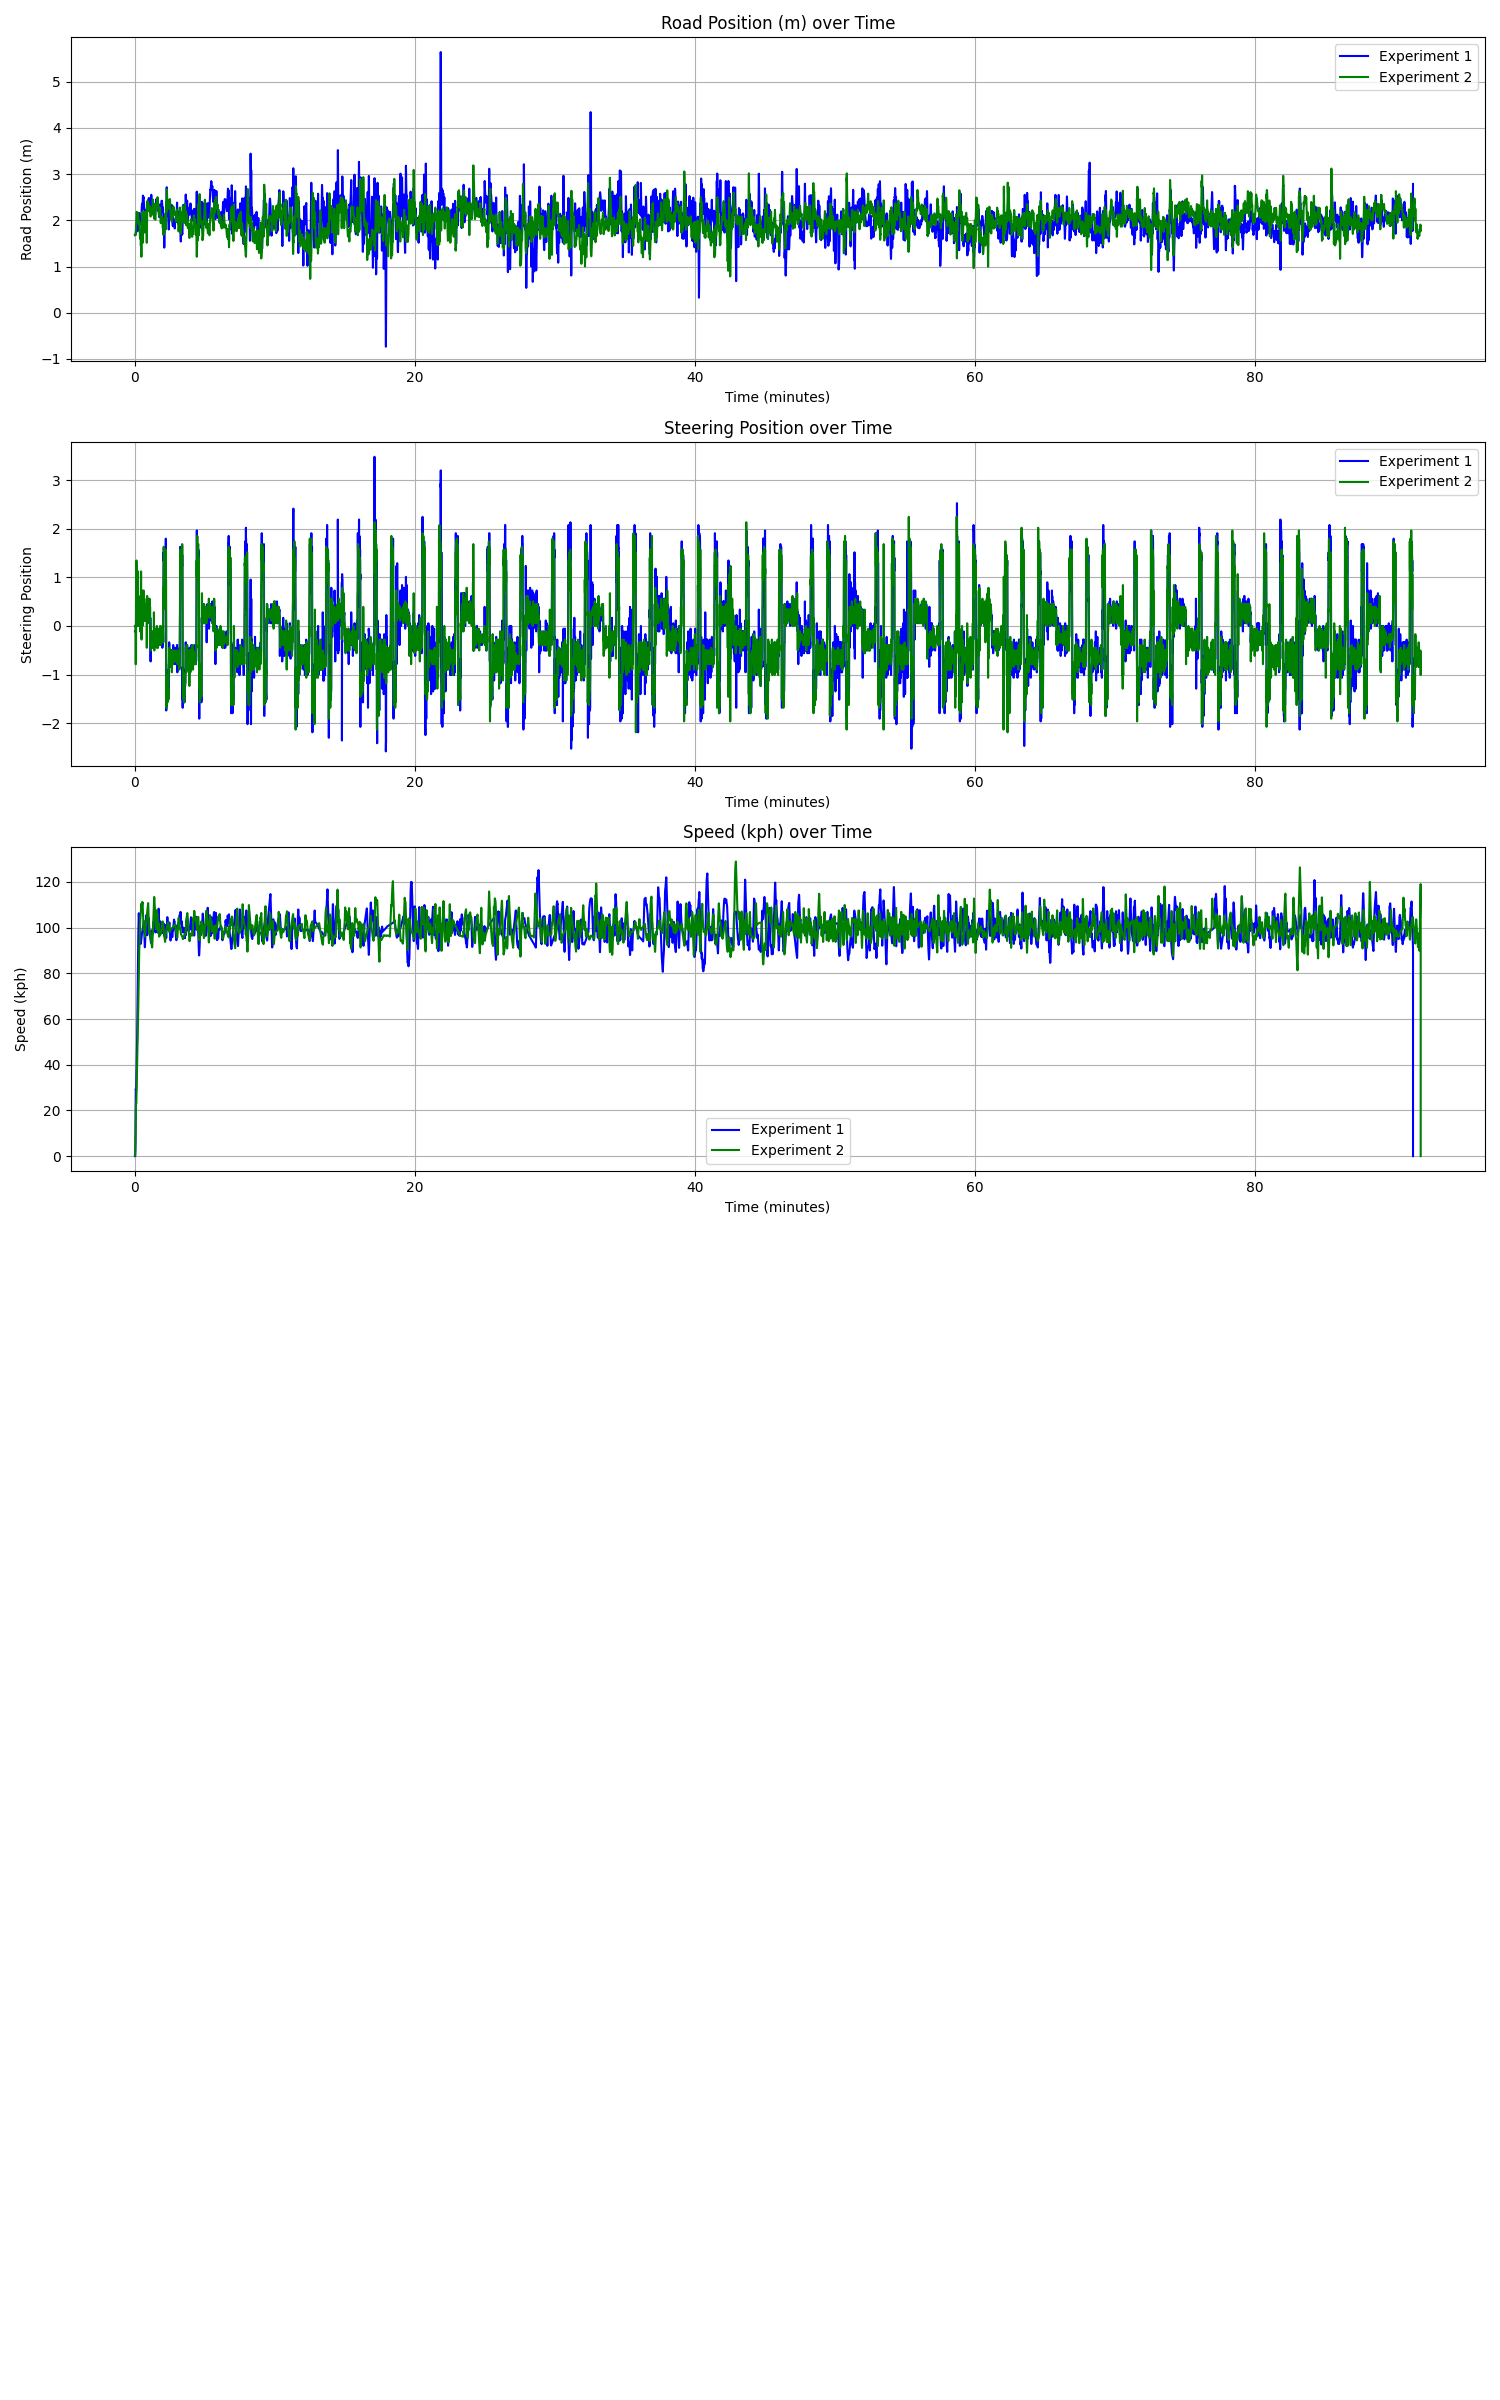

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy for numerical operations

# Read the CSV files
data2 = pd.read_csv('P006_S002.csv')
data1 = pd.read_csv('P006_S001.csv')

# Extract relevant columns for the first dataset
time_values1 = data1['Time'] / 60  # Convert to minutes
road_positions1 = data1['Road Position (m)']
steering_positions1 = data1['Steering Position']
speed_kph1 = data1['Speed (kph)']

# Extract relevant columns for the second dataset
time_values2 = data2['Time'] / 60  # Convert to minutes
road_positions2 = data2['Road Position (m)']
steering_positions2 = data2['Steering Position']
speed_kph2 = data2['Speed (kph)']

# Create figure for subplots
plt.figure(figsize=[15, 24])  # Adjusted for 6 subplots

# Define boundaries
lower_boundary = 0.837
upper_boundary = 2.511

# Subplot 1: Road Position (m) over Time for First Experiment
ax1 = plt.subplot(6, 1, 1)
ax1.plot(time_values1, road_positions1, 'blue',  label='Experiment 1')
ax1.plot(time_values2, road_positions2, 'green', label='Experiment 2')
ax1.set_title('Road Position (m) over Time')
ax1.set_xlabel('Time (minutes)')
ax1.set_ylabel('Road Position (m)')
ax1.grid(True)
ax1.legend()

# Subplot 2: Steering Position over Time for First Experiment
ax2 = plt.subplot(6, 1, 2)
ax2.plot(time_values1, steering_positions1, 'blue', label='Experiment 1')
ax2.plot(time_values2, steering_positions2, 'green', label='Experiment 2')
ax2.set_title('Steering Position over Time')
ax2.set_xlabel('Time (minutes)')
ax2.set_ylabel('Steering Position')
ax2.grid(True)
ax2.legend()

# Subplot 3: Speed (kph) over Time for First Experiment
ax3 = plt.subplot(6, 1, 3)
ax3.plot(time_values1, speed_kph1, 'blue', label='Experiment 1')
ax3.plot(time_values2, speed_kph2, 'green', label='Experiment 2')
ax3.set_title('Speed (kph) over Time')
ax3.set_xlabel('Time (minutes)')
ax3.set_ylabel('Speed (kph)')
ax3.grid(True)
ax3.legend()

# Repeat plotting for Experiment 2 below if needed, or adjust plots as required.

plt.tight_layout()  # Adjust layout for clarity
plt.show()